In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import os
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro
from pandas.plotting import lag_plot
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [25]:
os.chdir(r"C:\Users\vasan\OneDrive\Desktop")

# Data Collection

## Data Extraction

In [26]:
start_date = '2012-01-01'
end_date   = '2022-03-01'
tickers    = ['AAPL','MSFT','AMZN','GOOG']
file_cmp_dict   = {'AAPL':'apple_stock', 'MSFT':'microsoft_stock','GOOG':'google_stock','AMZN':'amazon_stock'} 
cmp_name = {'AAPL':'APPLE', 'MSFT':'MICROSOFT','GOOG':'GOOGLE','AMZN':'AMAZON'} 
for ticker in tickers:
    data =yf.download(ticker, start_date, end_date)
    file_name=str(file_cmp_dict[ticker]+'.csv')
    fdir = '/Users/vasan/OneDrive/Desktop/SDP/Datasets/' + file_name
    filepath = Path(fdir)
    filepath.parent.mkdir(parents=True, exist_ok=True)
    data.to_csv(filepath)    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Concated Dataset

In [27]:
start_date = '2021-01-01'
end_date   = '2022-03-01'
tickers    = ['AAPL','MSFT','AMZN','GOOG']
df = pd.DataFrame()
for ticker in tickers:
    data =yf.download(ticker, start_date, end_date)
    tag = cmp_name[ticker]
    data['Company'] = tag
    df = df.append(data)    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
fdir = '/Users/vasan/OneDrive/Desktop/SDP/Datasets/concated_data.csv'
filepath = Path(fdir)
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

In [29]:
df

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2020-12-31,134.080002,134.740005,131.720001,132.690002,131.515961,99116600,APPLE
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.264999,143301900,APPLE
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.850845,97664900,APPLE
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.479851,155088000,APPLE
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.761627,109578200,APPLE
...,...,...,...,...,...,...,...
2022-02-22,2599.699951,2638.014893,2554.820068,2588.050049,2588.050049,1945300,GOOGLE
2022-02-23,2621.570068,2634.979980,2550.070068,2551.699951,2551.699951,1321600,GOOGLE
2022-02-24,2500.000000,2660.739990,2495.290039,2653.469971,2653.469971,2158300,GOOGLE


# Data Viz

In [30]:
df.reset_index(inplace=True)
df.set_index(['Company', 'Date'], inplace=True)

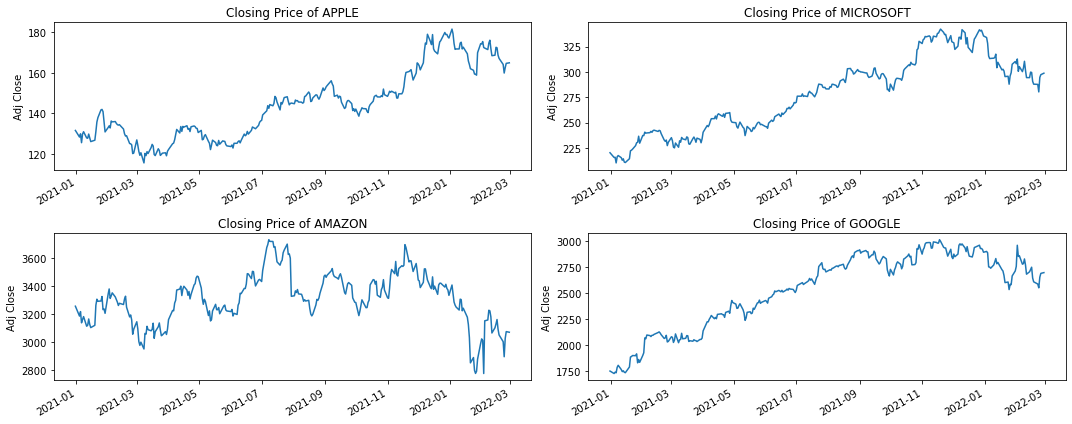

In [31]:
plt.figure(figsize=(15, 6))
i=1
for ticker in tickers:
    plt.subplot(2, 2, i)
    i=i+1
    company = df.loc[(cmp_name[ticker]), :]
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {cmp_name[ticker]}")
    
plt.tight_layout()

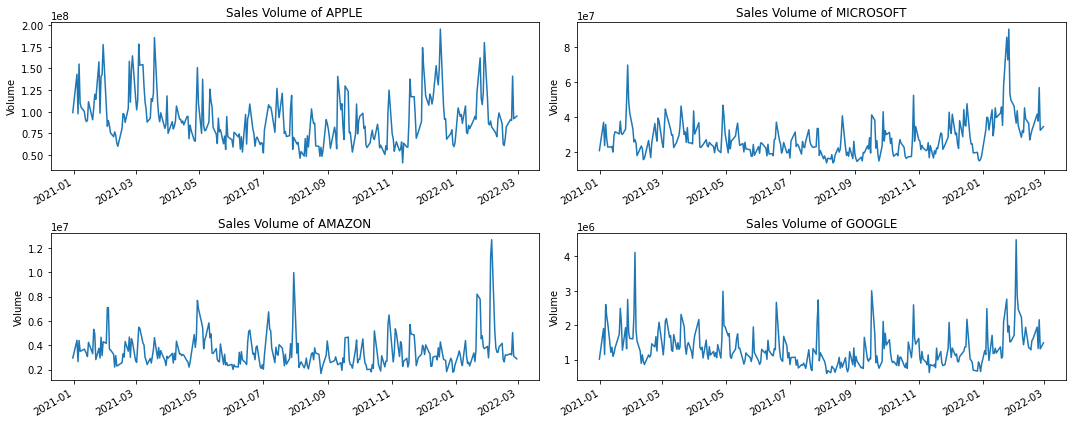

In [32]:
plt.figure(figsize=(15, 6))
i=1
for ticker in tickers:
    plt.subplot(2, 2, i)
    i=i+1
    company = df.loc[(cmp_name[ticker]), :]
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume of {cmp_name[ticker]}")
    
plt.tight_layout()

In [33]:
mav_df = pd.DataFrame()
ma_day = [7, 14, 21]
for ticker in tickers:
    company = df.loc[cmp_name[ticker], :]
    company['Daily Return'] = company['Adj Close'].pct_change()
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        company['Company'] = cmp_name[ticker]
    mav_df = mav_df.append(company)

In [34]:
mav_df.sample(10)

,Open,High,Low,Close,Adj Close,Volume,Daily Return,MA for 7 days,Company,MA for 14 days,MA for 21 days
Date,,,,,,,,,,,
2022-01-19,2738.770020,2767.989990,2710.000000,2713.040039,2713.040039,1039800,-0.004685,2774.570033,GOOGLE,2804.973615,2843.058605
2021-10-29,2910.399902,2972.260010,2903.330078,2965.409912,2965.409912,1447700,0.014655,2859.078578,GOOGLE,2839.392857,2808.973819
2021-08-11,3331.449951,3337.699951,3277.790039,3292.110107,3292.110107,2947200,-0.008604,3342.364293,AMAZON,3447.764997,3500.058559
2022-02-24,152.580002,162.850006,152.000000,162.740005,162.501251,141147500,0.016680,166.705072,APPLE,169.283423,169.242251
2021-03-10,121.690002,122.169998,119.449997,119.980003,119.096130,111943300,-0.009167,119.989499,APPLE,122.184636,125.682483
2021-04-15,133.820007,135.000000,133.639999,134.500000,133.509171,89347100,0.018708,130.951002,APPLE,126.434523,124.557028
2021-09-24,2818.919922,2858.070068,2817.010010,2852.659912,2852.659912,747500,0.005686,2828.281424,GOOGLE,2856.017857,2868.241420
2021-06-11,126.529999,127.440002,126.099998,127.349998,126.626549,53522400,0.009833,125.377970,APPLE,125.194732,125.175794
2021-09-30,2686.500000,2711.800049,2660.000000,2665.310059,2665.310059,1764700,-0.009333,2773.912842,GOOGLE,2810.638585,2837.638091


In [35]:
mav_df.reset_index(inplace=True)
mav_df.set_index(['Company', 'Date'], inplace=True)

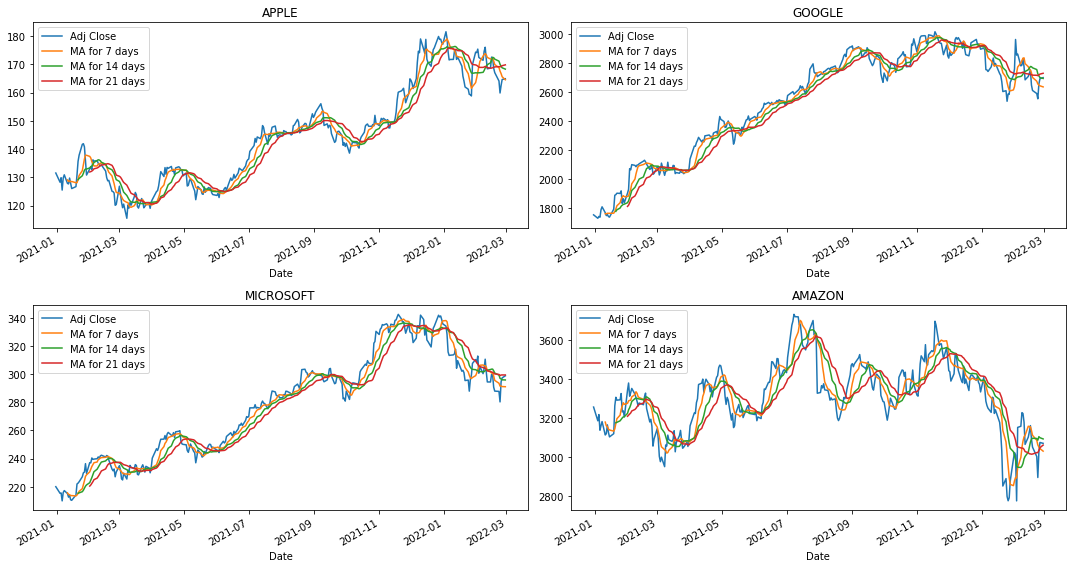

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

mav_df.loc[(cmp_name['AAPL']), ['Adj Close', 'MA for 7 days', 'MA for 14 days', 'MA for 21 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

mav_df.loc[(cmp_name['GOOG']),['Adj Close', 'MA for 7 days', 'MA for 14 days', 'MA for 21 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

mav_df.loc[(cmp_name['MSFT']), ['Adj Close', 'MA for 7 days', 'MA for 14 days', 'MA for 21 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

mav_df.loc[(cmp_name['AMZN']), ['Adj Close', 'MA for 7 days', 'MA for 14 days', 'MA for 21 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

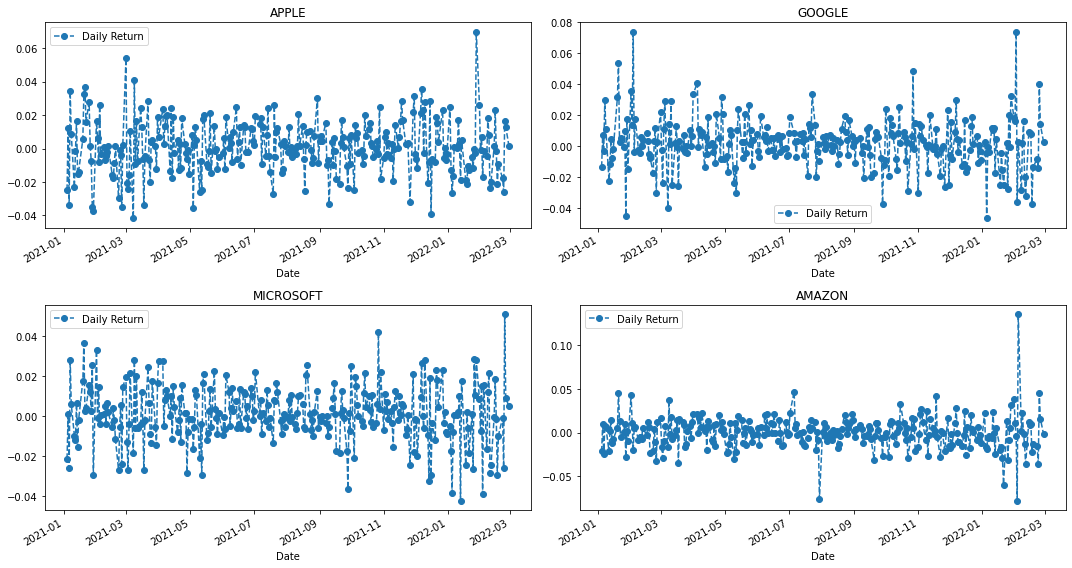

In [37]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

mav_df.loc[(cmp_name['AAPL']), ['Daily Return']].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

mav_df.loc[(cmp_name['GOOG']),['Daily Return']].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

mav_df.loc[(cmp_name['MSFT']), ['Daily Return']].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

mav_df.loc[(cmp_name['AMZN']), ['Daily Return']].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

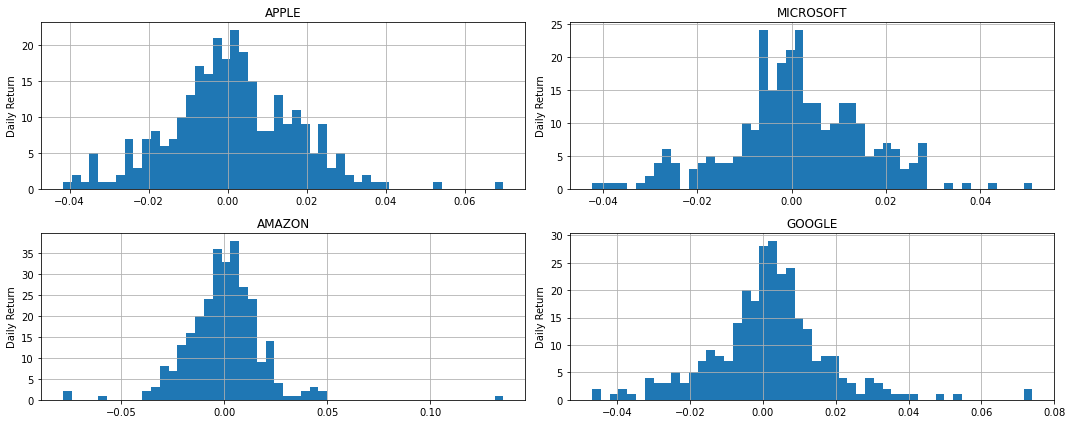

In [38]:
plt.figure(figsize=(15, 6))
i=1
for ticker in tickers:
    plt.subplot(2, 2, i)
    i=i+1
    company = mav_df.loc[(cmp_name[ticker]), :]
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{cmp_name[ticker]}')
    
plt.tight_layout()

In [39]:
mav_df['Total Traded'] = mav_df['Open']*mav_df['Volume']

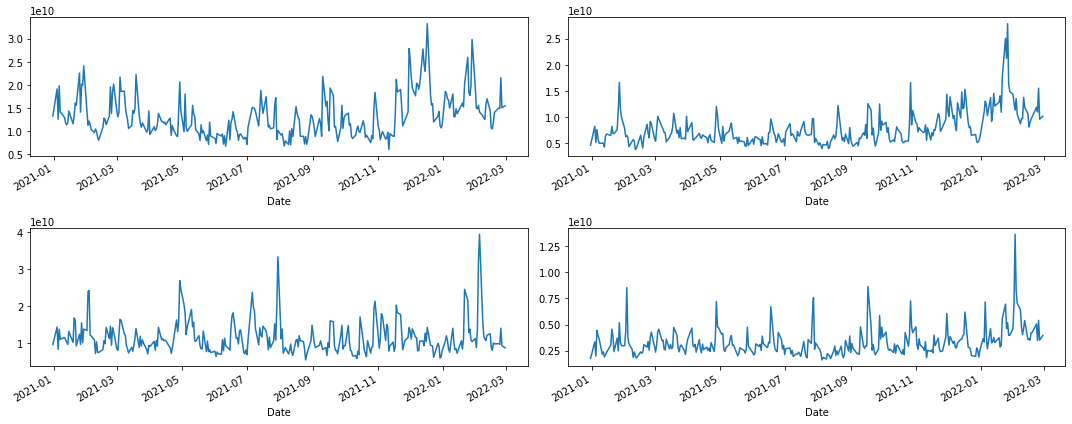

In [40]:
plt.figure(figsize=(15, 6))
i=1
for ticker in tickers:
    plt.subplot(2, 2, i)
    i=i+1
    company = mav_df.loc[(cmp_name[ticker]), :]
    company['Total Traded'].plot(label= f'{cmp_name[ticker]} Total Traded')
    
plt.tight_layout()

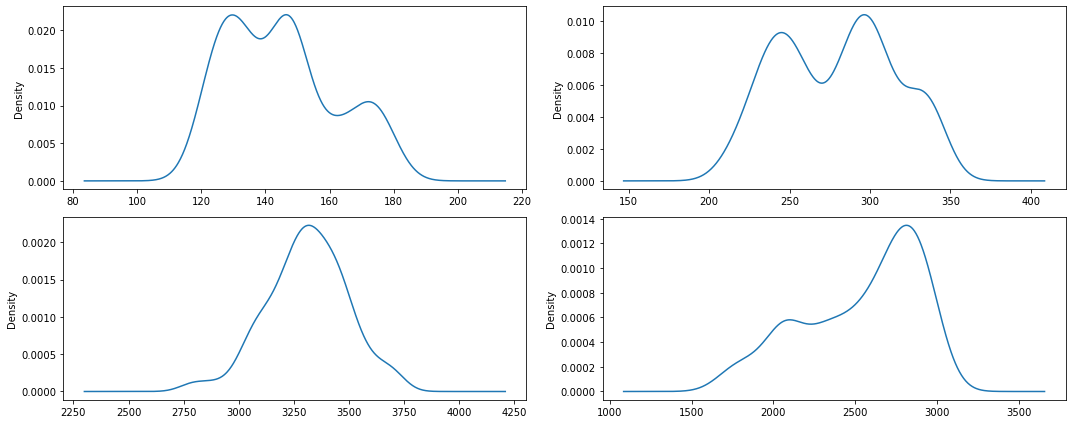

In [41]:
plt.figure(figsize=(15, 6))
i=1
for ticker in tickers:
    plt.subplot(2, 2, i)
    i=i+1
    company = mav_df.loc[(cmp_name[ticker]), :]
    company['Close'].plot(kind='kde',label= f'{cmp_name[ticker]} Total Traded')
    
plt.tight_layout()

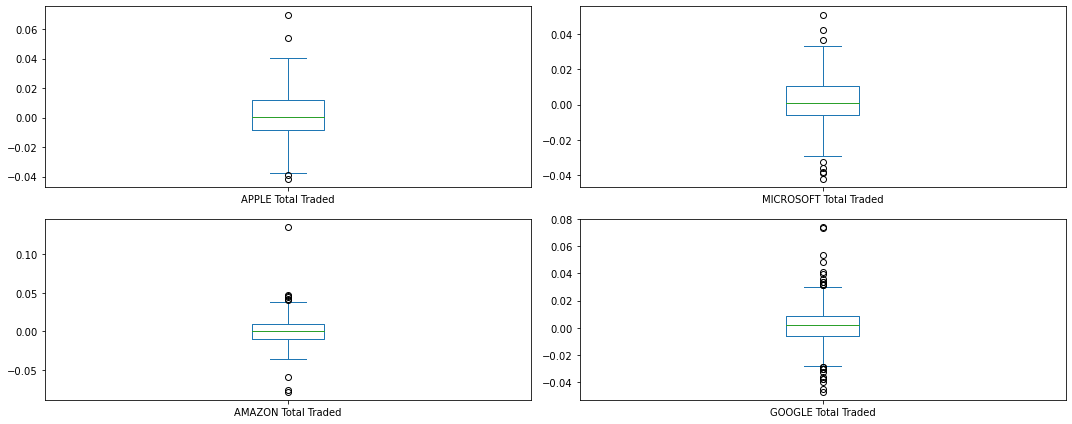

In [42]:
plt.figure(figsize=(15, 6))
i=1
for ticker in tickers:
    plt.subplot(2, 2, i)
    i=i+1
    company = mav_df.loc[(cmp_name[ticker]), :]
    company['Daily Return'].plot(kind='box',label= f'{cmp_name[ticker]} Total Traded')
    
plt.tight_layout()

In [43]:
fdir = '/Users/vasan/OneDrive/Desktop/SDP/Datasets/viz_data.csv'
filepath = Path(fdir)
filepath.parent.mkdir(parents=True, exist_ok=True)
mav_df.to_csv(filepath)

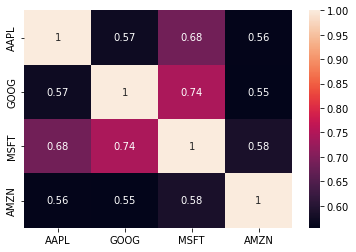

In [44]:
rtn_hmp_data = pd.DataFrame({'AAPL':list(mav_df.loc[('APPLE'),'Daily Return']),
                        'GOOG':list(mav_df.loc[('GOOGLE'),'Daily Return']),
                        'MSFT':list(mav_df.loc[('MICROSOFT'),'Daily Return']),
                        'AMZN':list(mav_df.loc[('AMAZON'),'Daily Return'])})
sns.heatmap(rtn_hmp_data.corr(),annot=True);

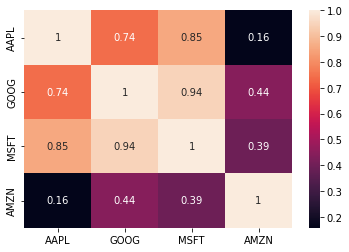

In [45]:
cls_hmp_data = pd.DataFrame({'AAPL':list(mav_df.loc[('APPLE'),'Adj Close']),
                        'GOOG':list(mav_df.loc[('GOOGLE'),'Adj Close']),
                        'MSFT':list(mav_df.loc[('MICROSOFT'),'Adj Close']),
                        'AMZN':list(mav_df.loc[('AMAZON'),'Adj Close'])})
sns.heatmap(cls_hmp_data.corr(),annot=True);